In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
import scipy as sm 
from statsmodels.stats.anova import anova_lm
import scipy.stats as st 

In [56]:
def skew_to_normal(data, col):
    power = 1
    divide = data[col].max()/3
    i = 1
    if(data[col].skew() < -1):
        reach_mean = data[col].mean()
        new_mean = np.mean(data[col].apply(lambda x: (x/divide)**power))
        while i < 20:
            c = reach_mean/new_mean
            if(c <= 1):
                break
            else:
                new_mean = np.mean(data[col].apply(lambda x: (x/divide)**power))
                power += 0.2
                i = i+1
        normal_list = data[col].apply(lambda x: (x/divide)**power)
        return (normal_list, power, divide, f'formul =(x/{divide})**{power}') 
    
    else:
        normal_list=np.log(data[col])
        return (normal_list, "use natural log tansformation") 
    

In [57]:
l1=st.skewnorm.rvs(-9, size=100)

In [43]:
data_frame=pd.DataFrame(l1,columns=['skew_data'])


-1.0344925296482597

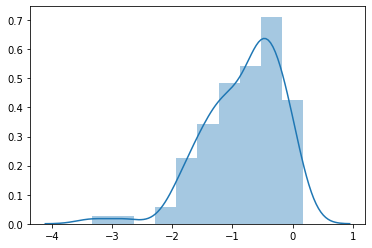

In [58]:
sns.distplot(l1)
st.skew(l1)

In [45]:
data_frame

,skew_data
0,-0.937671
1,-0.474199
2,-0.789358
3,-0.224891
4,-0.787612
...,...
95,-0.558663
96,-0.232715
97,-1.212555
98,-1.199225


In [53]:
l1=skew_to_normal(data_frame,'skew_data')
type(l1[0])

pandas.core.series.Series

In [55]:
st.skew(l1[0])

-0.6409439618297321